In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
x=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y=np.array([0,0,0,0,1,1,1,1,1,1])

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(x_test)
print("Predictions:",y_pred)

Predictions: [1 0]


In [29]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


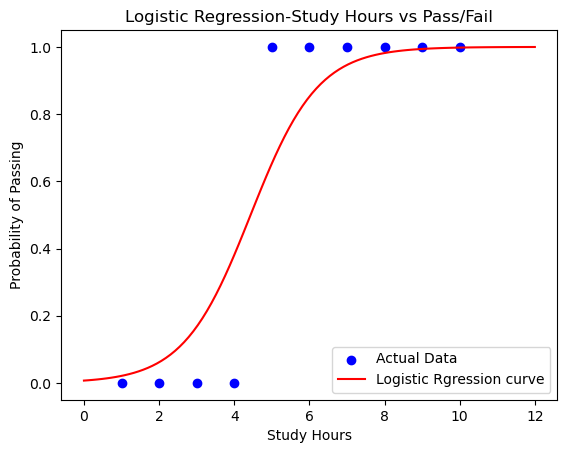

In [30]:
import matplotlib.pyplot as plt
x_range=np.linspace(0,12,100).reshape(-1,1)
y_prob=model.predict_proba(x_range)[:,1]
plt.scatter(x,y,color="blue",label="Actual Data")
plt.plot(x_range,y_prob,color="red",label="Logistic Rgression curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression-Study Hours vs Pass/Fail")
plt.legend()
plt.show()

**Heart Disease prediction**

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("C:\\Users\\CVR\\Downloads\\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False  False  False     False  False  False    False    False  False   
1     False  False  False     False  False  False    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False  False    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
1020  False  False  False     False  False  False    False    False  False   
1021  False  False  False     False  False  False    False    False  False   
1022  False  False  False     False  False  False    False    False  False   
1023  False  False  False     False  False  False    False    False  False   
1024  False  False  False     False  False  False    False    False  False   

 

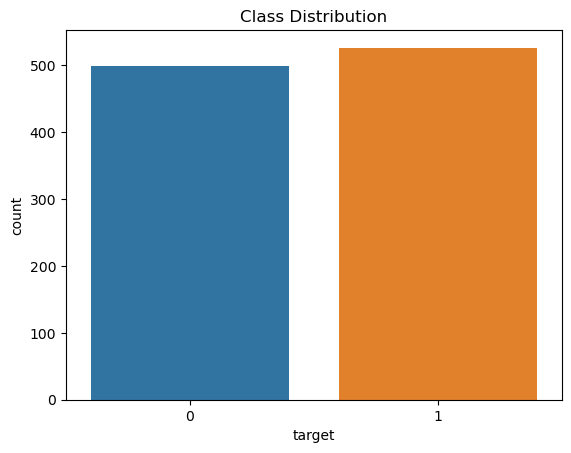

In [36]:
print(df.isnull().sum)
print(df.describe())
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()

In [37]:
x=df.drop("target",axis=1)
y=df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [38]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(x_test)
print("Predictions:",y_pred)

Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [43]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy:.2f}")


Accuracy : 0.80



 Classification report :
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



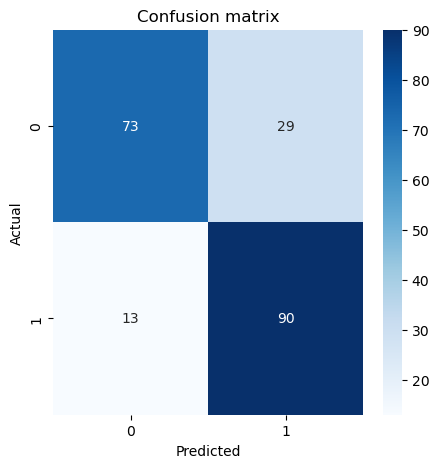

In [44]:
print("\n Classification report :\n",classification_report(y_test,y_pred))

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()